# Notes
* Two possible directions: train a single multi-output regression model (which predicts a matrix of form ```i=[[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]]```, a triplet of multi-output regression models that predict matrices of form ```j=[a, b, c]```, or a set of nine regression models that each predict a value in ```i.flatten()```

# Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)
data_df = pd.read_csv('https://github.com/personal-research/MAXI-J1535/raw/main/data/processed/full.csv')

In [ ]:
data_df = data_df.sample(frac=1) # shuffle the dataframe

def normalize(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# X

arr_names =  ['hardness', 'tins', 'disk_norm', 'gammas', 'nthcomp_norms', 'intensities']
(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities) = (normalize(np.array(data_df[arr_name])) for arr_name in arr_names)

## Stack x values
x_vals = np.array([], dtype=np.int64).reshape(0,6)

for a, b, c, d, e, f in zip(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities): 
    new_arr = np.array([float(a), float(b), float(c), float(d), float(e), float(f)])
    x_vals = np.vstack([x_vals, new_arr])

# Y 
y_vals = np.array([], dtype=np.float32).reshape(0, 3)

freq1s, freq2s, freq3s = (normalize(np.array(data_df[arr_name])) for arr_name in ['first_par1s', 'second_par1s', 'third_par1s'])

for freq1, freq2, freq3 in zip(freq1s, freq2s, freq3s): 
    new_arr = np.array([float(freq1), float(freq2), float(freq3)])
    y_vals = np.vstack([y_vals, new_arr])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.1)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.33129337 0.41779839 0.        ]
 [0.34626136 0.43667523 0.        ]
 [0.         0.         0.        ]
 [0.66447537 0.85669875 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.62185815 0.79294476 0.        ]
 [0.         0.         0.        ]
 [0.68686658 0.57557918 0.        ]
 [0.39100468 0.48768273 0.        ]
 [0.         0.         0.        ]
 [0.30327117 0.38245842 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.36190685 0.45640422 0.        ]
 [0.         0.         0.        ]
 [0.33497425 0.43667523 0.        ]
 [0.         0.         0.        ]
 [0.38245972 0.48768273 0.        ]
 [0.17455763 0.50411623 1.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.35792982 0.45640422 0.  

In [ ]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu')) # fix this line
    model.add(layers.Dense(10, activation='relu')) 
    model.add(layers.Dense(3), activation='linear')
    opt = tf.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='mse', metrics='mae')

    return model

In [ ]:
model = get_model()
epochs = 1000
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)

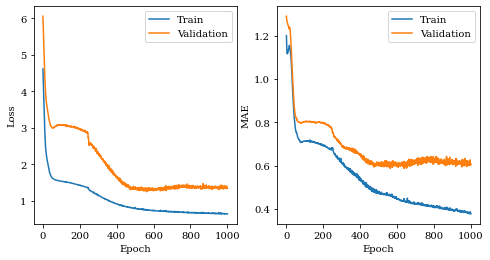

In [ ]:
#Evaluate model
hist = history.history
epochs_arr = np.array(range(1, epochs+1))

train_loss = hist['loss']
val_loss = hist['val_loss']

train_mae = hist['mae']
val_mae = hist['val_mae']

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.rcParams['font.family']='serif'

axs[0].plot(epochs_arr, train_loss, label='Train')
axs[0].plot(epochs_arr, val_loss, label='Validation')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].plot(epochs_arr, train_mae, label='Train')
axs[1].plot(epochs_arr, val_mae, label='Validation')
axs[1].set(xlabel='Epoch', ylabel='MAE')
axs[1].legend()

plt.show()

In [ ]:
model = get_model()
epochs = 250
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)
results = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)
'''
y_pred = np.array([]).astype(int)

labels = [0, 1, 2, 3]

for row in predictions: 
    idx = np.argmax(row)
    y_pred = np.append(y_pred, labels[idx])

print(y_pred)
'''
print(results)

1/1 [==============================] - 0s 16ms/step - loss: 0.0210 - mae: 0.0787
[0.02102377638220787, 0.07868475466966629]


In [ ]:
print(y_test)
print(predictions)

[[0.17455763 0.50411623 1.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.36999222 0.46660052 0.        ]
 [0.         0.         0.        ]
 [0.27761814 0.35010686 0.        ]
 [0.30327117 0.38245842 0.        ]
 [0.19068646 0.67185446 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.48768406 0.62185626 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[ 0.4857859 ]
 [-0.00184246]
 [ 0.00005688]
 [ 0.2774638 ]
 [ 0.00005418]
 [ 0.2586884 ]
 [ 0.29110003]
 [ 0.3350851 ]
 [ 0.00220823]
 [-0.01421229]
 [-0.00306773]
 [ 0.00150108]
 [ 0.0007011 ]
 [-0.00048358]
 [-0.00050429]
 [ 0.07870494]
 [ 0.3832907 ]
 [ 0.14818472]
 [-0.00713205]]
